<a href="https://colab.research.google.com/github/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/blob/main/examples/heights_weights/heights_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sex, Height, and Weight

This dataset contains the heights and weights of 1000 random males and females. We will conduct some exploration and analysis of the dataset to illustrate the statistical significance between the means of the two populations.

![People height](https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201907/male-female-height-bell-curve-uconn-mit-sex-differences_0.jpeg?itok=PLgnFYf7)

In [69]:
# Import the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import scipy.stats as stats

In [70]:
# Read the dataaset from the specified URL
df = pd.read_csv("https://raw.githubusercontent.com/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/main/examples/heights-and-weights/sex_height_weight.csv")
df.shape

(1000, 4)

In [71]:
df.head() # Display the the head of the dataset

,Name,Sex,Height,Weight
0,Jennifer Wolfe,Male,178.476999,88.993554
1,Tina Barber,Female,161.170414,67.397069
2,Dr. David Beasley Jr.,Female,165.886131,60.477043
3,Jake Lewis,Female,171.138179,54.824506
4,John Alvarez,Male,173.360926,81.982233


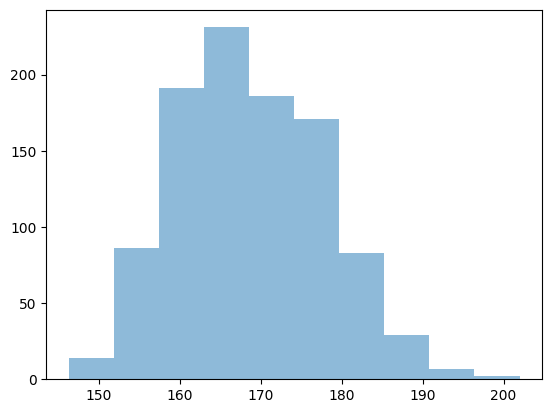

In [72]:
pyplot.hist(df['Height'], alpha=0.5) # Histogram for the population (males and females) heights
pyplot.show()

In [73]:
np.mean(df['Height']) # mean of the  population height (males and females, together)

168.6280909399918

In [74]:
df.groupby('Sex').size() # Group by Sex to find how many rows for each sex

Sex
Female    499
Male      501
dtype: int64

In [75]:
males_heights = df.loc[df['Sex'] == 'Male']['Height'] # Extract the height of the males
males_heights.head()

0     178.476999
4     173.360926
10    171.756076
12    176.693736
14    162.925575
Name: Height, dtype: float64

In [76]:
females_heights = df.loc[df['Sex'] == 'Female']['Height']  # Extract the height of the females
females_heights.head()

1    161.170414
2    165.886131
3    171.138179
5    160.595178
6    171.475277
Name: Height, dtype: float64

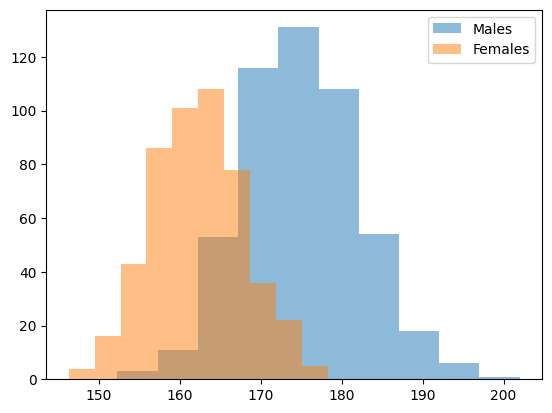

In [77]:
pyplot.hist(males_heights, alpha=0.5, label='Males') # Histogram for the males heights
pyplot.hist(females_heights, alpha=0.5, label='Females') # Histogram for the females heights
pyplot.legend(loc='upper right')
pyplot.show()

In [78]:
np.mean(males_heights) # the mean of the males heights

174.987405659491

In [79]:
np.mean(females_heights) # the mean of the females heights

162.24328798514392

## Statistical Significance in the difference between the heights according to the sex

In [80]:
stats.ttest_ind(a=males_heights, b=females_heights)

Ttest_indResult(statistic=31.339296972405272, pvalue=1.1687212633442504e-150)

The above t-test shows statistical significance p-value (1.16e-150 is much smaller than 0.05)

In [81]:
sample1 = males_heights.sample(n=10)
sample1

497    173.667629
750    168.537367
943    174.305769
193    166.279829
868    179.609810
59     181.828816
851    171.111660
513    168.647054
107    176.222045
311    182.691438
Name: Height, dtype: float64

In [82]:
np.mean(sample1)

174.29014170170854

In [83]:
sample2 = males_heights.sample(n=10)
sample2

682    171.328358
981    177.978203
427    179.802360
567    167.943396
698    181.468189
332    175.530632
283    166.335292
398    174.198221
49     162.658719
425    184.580421
Name: Height, dtype: float64

In [84]:
np.mean(sample2)

174.1823790560539

In [85]:
np.mean(sample1) - np.mean(sample2)

0.10776264565464544

In [86]:
stats.ttest_ind(a=sample1, b=sample2)

Ttest_indResult(statistic=0.037342682955653156, pvalue=0.9706228086268043)

In [87]:
diff = []
for i in range(10000):
    sample1 = males_heights.sample(n=10)
    sample2 = males_heights.sample(n=10)
    diff.append(np.mean(sample1) - np.mean(sample2))

np.mean(diff)

-0.006452186022467788

(array([  14.,  100.,  499., 1609., 2661., 2781., 1576.,  617.,  123.,
          20.]),
 array([-12.02653049,  -9.64511428,  -7.26369808,  -4.88228188,
         -2.50086568,  -0.11944948,   2.26196673,   4.64338293,
          7.02479913,   9.40621533,  11.78763153]),
 <BarContainer object of 10 artists>)

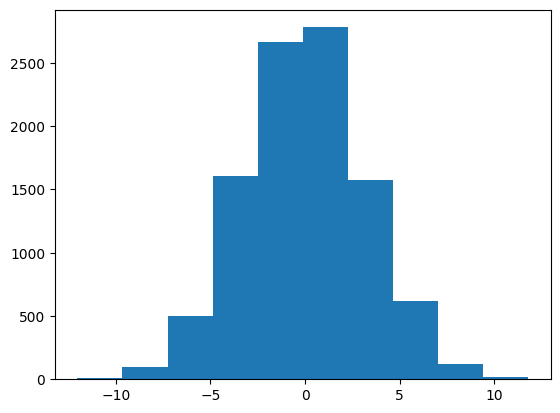

In [88]:
pyplot.hist(x=diff)

In [89]:
diff = []
for i in range(10000):
    sample1 = males_heights.sample(n=10)
    sample2 = females_heights.sample(n=10)
    diff.append(np.mean(sample1) - np.mean(sample2))

np.mean(diff)

12.785709889078133

(array([  24.,  169.,  708., 1793., 2644., 2499., 1483.,  542.,  124.,
          14.]),
 array([ 3.00909755,  5.01213242,  7.01516729,  9.01820217, 11.02123704,
        13.02427191, 15.02730678, 17.03034165, 19.03337653, 21.0364114 ,
        23.03944627]),
 <BarContainer object of 10 artists>)

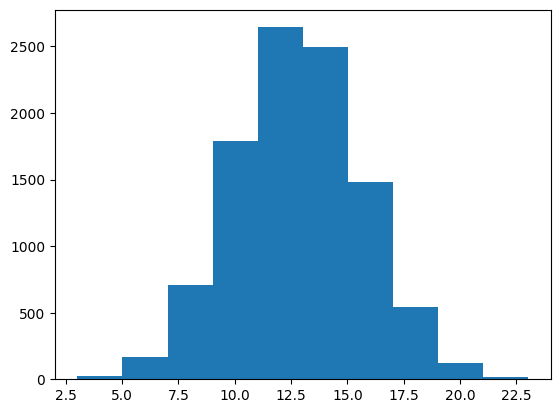

In [90]:
pyplot.hist(x=diff)